# Library

In [27]:
import FinanceDataReader as fdr #주식데이터 불러오기
import OpenDartReader # 주식데이터 openapi 사용툴
import pandas as pd # 데이터저장
import matplotlib as mpl # 시각화
import matplotlib.pyplot as plt # 시각화
import matplotlib.font_manager as fm # 한글폰트 적용
import seaborn as sns # 시각화
import numpy as np
font_path = r'C:\Windows\Fonts\NanumBarunGothic.ttf' # 한글폰트 경로

In [28]:
import warnings
warnings.filterwarnings('ignore')
#오류 제거

# 데이터 불러오기

In [3]:
df = fdr.DataReader(symbol='005930',start='2020')  
# symbol : 종목코드 , 무조건 6자리 사용
# 시작점 미설정시 : 상장일부터
# 종료점 미설정시 : 현재일까지
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-01-02,55500,56000,55000,55200,12993228,-0.010753
2020-01-03,56000,56600,54900,55500,15422255,0.005435
2020-01-06,54900,55600,54600,55500,10278951,0.000000
2020-01-07,55700,56400,55600,55800,10009778,0.005405
2020-01-08,56200,57400,55900,56800,23501171,0.017921
...,...,...,...,...,...,...
2021-11-04,71200,71600,70500,70600,11818987,0.002841
2021-11-05,71600,71600,70200,70200,12667743,-0.005666
2021-11-08,70400,70600,69800,70600,11121981,0.005698


In [4]:
df = df.rename(columns={'Open' : '시가',   # 이해하기 쉽게 칼럼을 한글로 변경
                        'High' : '고가',
                        'Low' : '저가',
                        'Close' : '종가',
                        'Volume' : '거래량',
                        'Change' : '등락률',                     
                           })
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 460 entries, 2020-01-02 to 2021-11-10
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시가      460 non-null    int64  
 1   고가      460 non-null    int64  
 2   저가      460 non-null    int64  
 3   종가      460 non-null    int64  
 4   거래량     460 non-null    int64  
 5   등락률     460 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 25.2 KB


# 데이터 정규화

In [39]:
# 데이터 정규화 0~1로
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols = ['시가', '고가', '저가', '종가', '거래량']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols
df_scaled
#df = df.rename_axis('index').reset_index() # 데이터 인덱스 추가

,시가,고가,저가,종가,거래량
0,0.270440,0.233803,0.269068,0.261856,0.077201
1,0.280922,0.245070,0.266949,0.268041,0.106193
2,0.257862,0.226291,0.260593,0.268041,0.044803
3,0.274633,0.241315,0.281780,0.274227,0.041590
4,0.285115,0.260094,0.288136,0.294845,0.202622
...,...,...,...,...,...
455,0.599581,0.526761,0.597458,0.579381,0.063185
456,0.607966,0.526761,0.591102,0.571134,0.073316
457,0.582809,0.507981,0.582627,0.579381,0.054866
458,0.580713,0.515493,0.588983,0.577320,0.055314


# 시계열 데이터의 데이터셋 분리

In [40]:
def make_dataset(data, label, window_size=20):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [41]:
TEST_SIZE = 200
WINDOW_SIZE = 20

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [42]:
from sklearn.model_selection import train_test_split

feature_cols = ['시가', '고가', '저가', '거래량']
label_cols = ['종가']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 20)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((160, 20, 4), (48, 20, 4))

In [43]:
test_feature = test[feature_cols]
test_label = test[label_cols]


test_feature, test_label = make_dataset(test_feature, test_label, 20)
test_feature.shape, test_label.shape

((180, 20, 4), (180, 1))

In [10]:
train_feature

array([[[0.27044025, 0.23380282, 0.2690678 , 0.07720056],
        [0.28092243, 0.24507042, 0.26694915, 0.10619318],
        [0.25786164, 0.22629108, 0.26059322, 0.04480323],
        ...,
        [0.34591195, 0.30328638, 0.34957627, 0.11841371],
        [0.33962264, 0.28638498, 0.30720339, 0.17064325],
        [0.31865828, 0.27887324, 0.29872881, 0.15784222]],

       [[0.28092243, 0.24507042, 0.26694915, 0.10619318],
        [0.25786164, 0.22629108, 0.26059322, 0.04480323],
        [0.27463312, 0.24131455, 0.28177966, 0.04159041],
        ...,
        [0.33962264, 0.28638498, 0.30720339, 0.17064325],
        [0.31865828, 0.27887324, 0.29872881, 0.15784222],
        [0.27044025, 0.2600939 , 0.27330508, 0.20851969]],

       [[0.25786164, 0.22629108, 0.26059322, 0.04480323],
        [0.27463312, 0.24131455, 0.28177966, 0.04159041],
        [0.2851153 , 0.2600939 , 0.28813559, 0.20262229],
        ...,
        [0.31865828, 0.27887324, 0.29872881, 0.15784222],
        [0.27044025, 0.260093

# Training

In [11]:
# Training

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )

model.add(Dense(1))

In [12]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                                    epochs=200, 
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/200
 1/12 [=>............................] - ETA: 6s - loss: 0.1050
Epoch 00001: val_loss improved from inf to 0.10590, saving model to model\tmp_checkpoint.h5
12/12 [==============================] - 1s 19ms/step - loss: 0.0983 - val_loss: 0.1059
Epoch 2/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0779
Epoch 00002: val_loss improved from 0.10590 to 0.07045, saving model to model\tmp_checkpoint.h5
12/12 [==============================] - 0s 5ms/step - loss: 0.0704 - val_loss: 0.0704
Epoch 3/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0372
Epoch 00003: val_loss improved from 0.07045 to 0.02465, saving model to model\tmp_checkpoint.h5
12/12 [==============================] - 0s 5ms/step - loss: 0.0368 - val_loss: 0.0247
Epoch 4/200
 1/12 [=>............................] - ETA: 0s - loss: 0.0085
Epoch 00004: val_loss improved from 0.02465 to 0.00600, saving model to model\tmp_checkpoint.h5
12/12 [==============================] - 0s 5ms/step -

# 주가 예측

In [13]:
model.load_weights(filename)
pred = model.predict(test_feature)

pred.shape

(180, 1)

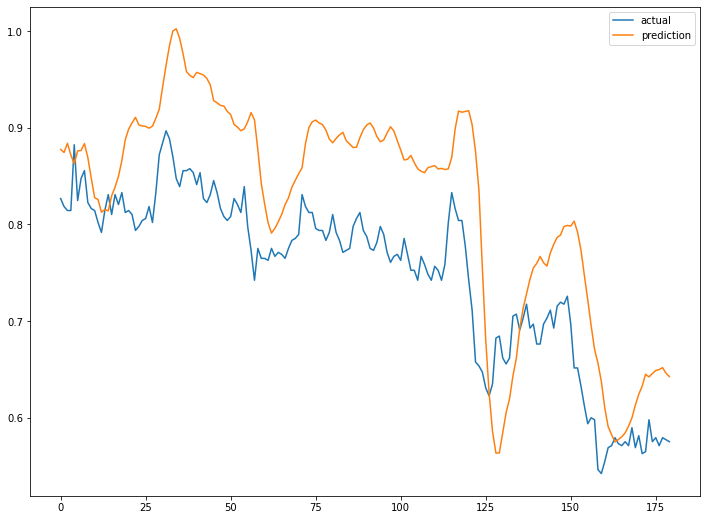

In [14]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,precision_recall_curve,roc_auc_score # 정확도 평가 방법